In [1]:
import sys
import os


# auto-reload library if developing library functionalities
%reload_ext autoreload
%autoreload 2
# Add the old-can-decoder-c56d4fe6 directory to sys.path
sys.path.append(os.path.abspath('old-can-decoder-c56d4fe6'))

# import library
from PandaCANDecoder.decoder import Decoder as OldDecoder
from can_decoder.decoder import Decoder

In [56]:
decoder = Decoder("./data/SampleRoadAcceleration_v2.csv")

# Generate message objects

byte_filters = {
    "18DA10F1": ["1", "2", "3", "4"],
    "18DAF110": ["1", "2", "3", "4"],
}

decoder.generate_msgs(byte_filters=byte_filters)
# Generate message time series data

decoder.generate_msg_ts_data(rewrite=True)  

Generated 235 messages


In [58]:
decoder.calculate_signals(
        tokenization_method='conditional_bit_flip',
        signedness_method='msb_classifier',
        alpha1=0.01,
        alpha2=0.5, #0.5,
        gamma1=0.2)

c:\Users\itimermans\OneDrive - Argonne National Laboratory\InigoTimermans\Projects\DataAnalysis\can-decoder\can_decoder\message.py:122: RuntimeWarning: invalid value encountered in cast
  n_bits = n_bytes * 8
c:\Users\itimermans\miniforge3\envs\main\Lib\site-packages\pandas\core\internals\managers.py:1753: RuntimeWarning: invalid value encountered in cast
  result[rl.indexer] = arr
c:\Users\itimermans\miniforge3\envs\main\Lib\site-packages\pandas\core\internals\managers.py:1753: RuntimeWarning: invalid value encountered in cast
  result[rl.indexer] = arr
c:\Users\itimermans\miniforge3\envs\main\Lib\site-packages\pandas\core\internals\managers.py:1753: RuntimeWarning: invalid value encountered in cast
  result[rl.indexer] = arr
c:\Users\itimermans\miniforge3\envs\main\Lib\site-packages\pandas\core\internals\managers.py:1753: RuntimeWarning: invalid value encountered in cast
  result[rl.indexer] = arr
c:\Users\itimermans\miniforge3\envs\main\Lib\site-packages\pandas\core\internals\manage

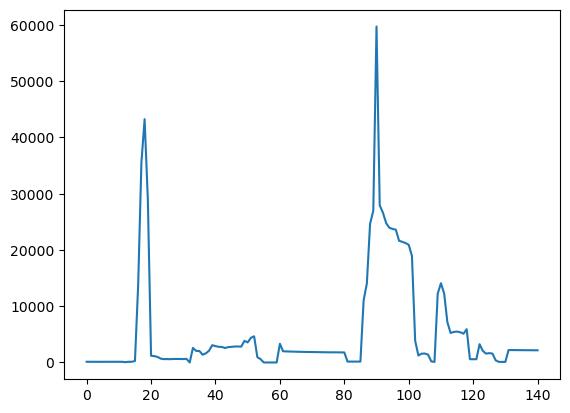

In [91]:
import matplotlib.pyplot as plt 

plt.plot(decoder.msgs[65].signals[1].ts_data)

In [55]:
decoder.get_message('18DA10F1',[0x3,0x22,1,201])

Message 18DA10F1 - Filter [B1:3|B2:34|B3:1|B4:201] : Length 8 bytes

In [94]:
decoder.plot_message_from_id('18DAF110',[0x5,98,1,201])

In [69]:
all_data = decoder.all_data

In [5]:
decoder.get_message('18DAF110').ts_data

,abs_time,1,2,3,4,5,6,7,8
0,0.579781,5,98,1,201,0,0,0,124
1,0.592854,5,98,1,209,4,24,0,124
2,0.599554,5,98,1,213,0,0,0,124
3,0.607635,5,98,2,178,0,0,0,124
4,0.617295,5,98,2,179,0,0,0,124
...,...,...,...,...,...,...,...,...,...
8135,89.463120,7,98,2,54,0,0,8,113
8136,89.479161,7,98,2,55,0,0,8,113
8137,89.494593,5,98,2,85,0,0,8,113
8138,89.501128,5,98,2,86,0,0,8,113


In [6]:
messages = [msg.msg_id for msg in decoder.msgs]
messages_diag = [msg for msg in messages if len(msg) > 3]
messages_diag

['18DA10F1',
 '18DA18F2',
 '18DAF110',
 '18DAF218',
 '1E360062',
 '1E360070',
 '1E360056',
 '1E360006',
 '1E360043',
 '1E360000',
 '1E384000',
 '1E360003',
 '1E36008D',
 '1E360018',
 '1E360024',
 '1E360016',
 '1E360046',
 '1E360023',
 '1E36000B',
 '1E384006',
 '1E360001',
 '1E36001D',
 '1E36007D',
 '1E360002',
 '1E36007E',
 '1E36001A',
 '1E360041']

In [7]:
all_data[all_data['arb_id'].str.startswith('18')]['2'].unique().tolist()

[34, 98, 15, 24, 10, 19, 25, 12, 23, 127, 62]

In [8]:
[hex(e) for e in all_data[all_data['arb_id'].str.len() > 4]['2'].unique().tolist()]

['0x22',
 '0x62',
 '0xf',
 '0x45',
 '0x18',
 '0x44',
 '0xa',
 '0x13',
 '0x19',
 '0xc',
 '0x17',
 '0x7f',
 '0x10',
 '0x0',
 '0x43',
 '0x3e']

In [9]:
byte_filters = {
    '18DAF218': [1,2,3]
}

In [10]:
all_data.drop_duplicates(subset=['arb_id', '1'])

,timestamp,network,length,arb_id,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
0,0.575097,DW CAN 01,32,42A,0,228,0,32,0,128,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,0.578058,DW CAN 01,8,18DA10F1,3,34,1,201,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,0.578207,DW CAN 01,8,18DA18F2,3,34,80,32,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,0.578388,DW CAN 01,32,113,0,0,0,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,0.578724,DW CAN 01,64,116,0,0,0,2,0,0,...,26,104,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200948,75.151554,DW CAN 01,32,40B,64,37,21,224,4,24,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
201772,75.454720,DW CAN 01,32,40B,63,117,21,224,4,24,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
209668,78.493489,DW CAN 01,32,40B,27,68,21,224,4,24,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
209937,78.593521,DW CAN 01,32,40B,22,70,21,224,4,24,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
